## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [18]:
import os
import keras

# 請嘗試設定 GPU：os.environ


In [64]:
train, test = keras.datasets.cifar10.load_data()

In [65]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = 2 * ((x-x.min()) / (x.max()-x.min())) - 1
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [66]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [67]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330 

In [68]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 60
BATCH_SIZE = 256

In [69]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [70]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/60
50000/50000 [==============================] - 17s 330us/step - loss: 1.7763 - accuracy: 0.3709 - val_loss: 1.5948 - val_accuracy: 0.4366
Epoch 2/60
50000/50000 [==============================] - 14s 276us/step - loss: 1.5223 - accuracy: 0.4630 - val_loss: 1.4971 - val_accuracy: 0.4715
Epoch 3/60
50000/50000 [==============================] - 14s 275us/step - loss: 1.3903 - accuracy: 0.5124 - val_loss: 1.4043 - val_accuracy: 0.5101
Epoch 4/60
50000/50000 [==============================] - 14s 277us/step - loss: 1.2928 - accuracy: 0.5434 - val_loss: 1.4200 - val_accuracy: 0.5091
Epoch 5/60
50000/50000 [==============================] - 14s 275us/step - loss: 1.2007 - accuracy: 0.5778 - val_loss: 1.3954 - val_accuracy: 0.5115
Epoch 6/60
50000/50000 [==============================] - 14s 277us/step - loss: 1.1212 - accuracy: 0.6053 - val_loss: 1.3894 - val_accuracy: 0.5246
Epoch 7/60
50000/50000 [==============================] 

50000/50000 [==============================] - 12s 235us/step - loss: 0.1049 - accuracy: 0.9651 - val_loss: 4.0456 - val_accuracy: 0.5278
Epoch 56/60
50000/50000 [==============================] - 14s 284us/step - loss: 0.1104 - accuracy: 0.9626 - val_loss: 3.8788 - val_accuracy: 0.5274
Epoch 57/60
50000/50000 [==============================] - 14s 275us/step - loss: 0.1159 - accuracy: 0.9614 - val_loss: 3.8940 - val_accuracy: 0.5179
Epoch 58/60
50000/50000 [==============================] - 14s 280us/step - loss: 0.1017 - accuracy: 0.9654 - val_loss: 3.9503 - val_accuracy: 0.5214
Epoch 59/60
50000/50000 [==============================] - 14s 283us/step - loss: 0.0835 - accuracy: 0.9722 - val_loss: 4.0658 - val_accuracy: 0.5342
Epoch 60/60
50000/50000 [==============================] - 14s 289us/step - loss: 0.0878 - accuracy: 0.9702 - val_loss: 4.0886 - val_accuracy: 0.5233


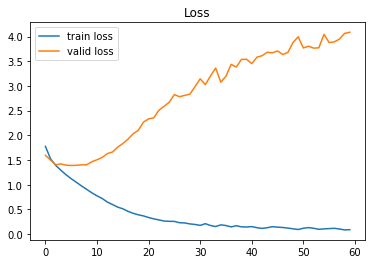

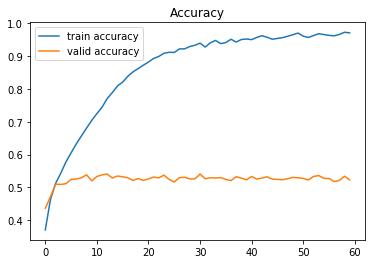

In [72]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()